In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

data = pd.read_excel('klasifikasi_data.xlsx')
df = pd.DataFrame(data)
df.style.hide_index()

Customer ID,Gender,Car Type,Shirt Size,Class
1,M,Family,Small,C0
2,M,Sports,Medium,C0
3,M,Sports,Medium,C0
4,M,Sports,Large,C0
5,M,Sports,Extra Large,C0
6,M,Sports,Extra Large,C0
7,F,Sports,Small,C0
8,F,Sports,Small,C0
9,F,Sports,Medium,C0
10,F,Luxury,Large,C0


In [2]:
la = LabelEncoder()

df['gender_n'] = la.fit_transform(df['Gender'])
df['car_type_n'] = la.fit_transform(df['Car Type'])
df['shirt_size_n'] = la.fit_transform(df['Shirt Size'])
df['class_n'] = la.fit_transform(df['Class'])
df

,Customer ID,Gender,Car Type,Shirt Size,Class,gender_n,car_type_n,shirt_size_n,class_n
0,1,M,Family,Small,C0,1,0,3,0
1,2,M,Sports,Medium,C0,1,2,2,0
2,3,M,Sports,Medium,C0,1,2,2,0
3,4,M,Sports,Large,C0,1,2,1,0
4,5,M,Sports,Extra Large,C0,1,2,0,0
5,6,M,Sports,Extra Large,C0,1,2,0,0
6,7,F,Sports,Small,C0,0,2,3,0
7,8,F,Sports,Small,C0,0,2,3,0
8,9,F,Sports,Medium,C0,0,2,2,0
9,10,F,Luxury,Large,C0,0,1,1,0


In [3]:
inputs = df.drop(['Customer ID','Gender','Car Type','Shirt Size','Class','class_n'],axis='columns')
target = df['class_n']

In [4]:
model = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
model.fit(inputs, target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [5]:
model.score(inputs,target)

0.95

[Text(167.4, 195.696, 'Gender <= 1.5\nentropy = 1.0\nsamples = 100.0%\nvalue = [0.5, 0.5]\nclass = C0'),
 Text(125.55000000000001, 152.208, 'Car Type <= 0.5\nentropy = 0.65\nsamples = 60.0%\nvalue = [0.167, 0.833]\nclass = C1'),
 Text(83.7, 108.72, 'entropy = 0.0\nsamples = 10.0%\nvalue = [0.0, 1.0]\nclass = C1'),
 Text(167.4, 108.72, 'Gender <= 0.5\nentropy = 0.722\nsamples = 50.0%\nvalue = [0.2, 0.8]\nclass = C1'),
 Text(83.7, 65.232, 'Car Type <= 2.5\nentropy = 0.918\nsamples = 15.0%\nvalue = [0.333, 0.667]\nclass = C1'),
 Text(41.85, 21.744, 'entropy = 0.0\nsamples = 10.0%\nvalue = [0.0, 1.0]\nclass = C1'),
 Text(125.55000000000001, 21.744, 'entropy = 0.0\nsamples = 5.0%\nvalue = [1.0, 0.0]\nclass = C0'),
 Text(251.10000000000002, 65.232, 'Car Type <= 1.5\nentropy = 0.592\nsamples = 35.0%\nvalue = [0.143, 0.857]\nclass = C1'),
 Text(209.25, 21.744, 'entropy = 1.0\nsamples = 10.0%\nvalue = [0.5, 0.5]\nclass = C0'),
 Text(292.95, 21.744, 'entropy = 0.0\nsamples = 25.0%\nvalue = [0.0,

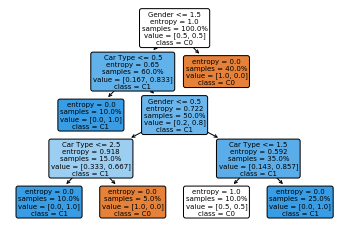

In [8]:
import matplotlib.pyplot as plt
tree.plot_tree(model.fit(inputs,target), max_depth=None, feature_names=['Customer ID','Gender','Car Type','Shirt Size',], class_names=['C0','C1'], label='all', filled=True, impurity=True, node_ids=False, proportion=True, rotate=True, rounded=True, precision=3, ax=None, fontsize=None)

In [7]:
inputs

,gender_n,car_type_n,shirt_size_n
0,1,0,3
1,1,2,2
2,1,2,2
3,1,2,1
4,1,2,0
5,1,2,0
6,0,2,3
7,0,2,3
8,0,2,2
9,0,1,1


In [48]:
model.predict([[0,1,2]])

array([1])